In [1]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv("datasetSentences.txt",sep="\t")
df.head()

sentence_index                                           sentence
0               1  The Rock is destined to be the 21st Century 's...
1               2  The gorgeously elaborate continuation of `` Th...
2               3                     Effective but too-tepid biopic
3               4  If you sometimes like to go to the movies to h...
4               5  Emerges as something rare , an issue movie tha...

In [14]:
split=pd.read_csv("datasetSplit.txt")
split.head()

sentence_index  splitset_label
0               1               1
1               2               1
2               3               2
3               4               2
4               5               2

In [15]:
print(df.shape)
print(split.shape)

(11855, 2)
(11855, 2)


In [16]:
todo=pd.merge(df,split,on="sentence_index")
print(todo.shape)

(11855, 3)


In [17]:
todo.head()

sentence_index                                           sentence  \
0               1  The Rock is destined to be the 21st Century 's...   
1               2  The gorgeously elaborate continuation of `` Th...   
2               3                     Effective but too-tepid biopic   
3               4  If you sometimes like to go to the movies to h...   
4               5  Emerges as something rare , an issue movie tha...   

   splitset_label  
0               1  
1               1  
2               2  
3               2  
4               2

In [18]:
train = todo[todo["splitset_label"]==1]
print(train.shape)

(8544, 3)


In [19]:
test = todo[todo["splitset_label"]==2]
print(test.shape)

(2210, 3)


In [20]:
dev = todo[todo["splitset_label"]==3]
print(dev.shape)

(1101, 3)


In [21]:
train.head()

sentence_index                                           sentence  \
0                1  The Rock is destined to be the 21st Century 's...   
1                2  The gorgeously elaborate continuation of `` Th...   
60              61  Singer\/composer Bryan Adams contributes a sle...   
61              62  You 'd think by now America would have had eno...   
62              63               Yet the act is still charming here .   

    splitset_label  
0                1  
1                1  
60               1  
61               1  
62               1

In [23]:
!pip install textblob
from textblob import TextBlob

In [24]:
my_valence=TextBlob(train.sentence[0])

In [25]:
print(train.sentence[0])
my_valence.sentiment

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .


Sentiment(polarity=0.21212121212121213, subjectivity=0.3181818181818182)

In [28]:
df_train=train.reset_index()

In [30]:
df_train.drop(["index","sentence_index","splitset_label"],axis=1,inplace=True)

In [36]:
print(df_train.shape)
df_train.head()

(8544, 1)


sentence
0  The Rock is destined to be the 21st Century 's...
1  The gorgeously elaborate continuation of `` Th...
2  Singer\/composer Bryan Adams contributes a sle...
3  You 'd think by now America would have had eno...
4               Yet the act is still charming here .

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

cloud_rep = WordCloud(background_color="white").generate(str(df_train.sentence))

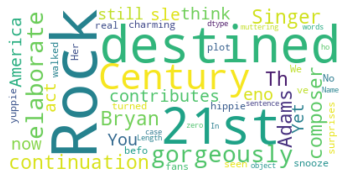

In [35]:
plt.imshow(cloud_rep,interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vect=CountVectorizer(max_features=1000,max_df=200,min_df=50,ngram_range=(1,2))

In [41]:
vect.fit(df_train.sentence)

CountVectorizer(max_df=200, max_features=1000, min_df=50, ngram_range=(1, 2))

In [42]:
X = vect.transform(df_train.sentence)

In [44]:
my_array=X.toarray()

In [45]:
X_df=pd.DataFrame(my_array,columns=vect.get_feature_names())

In [46]:
X_df.head()

about the  acting  action  actors  actually  after  again  age  all the  \
0          0       0       0       0         0      0      0    0        0   
1          0       0       0       0         0      0      0    0        0   
2          0       0       0       0         0      0      0    0        0   
3          0       0       0       0         0      0      0    0        0   
4          0       0       0       0         0      0      0    0        0   

   almost  ...  would be  writer  year  years  yet  you can  you ll  you re  \
0       0  ...         0       0     0      0    0        0       0       0   
1       0  ...         0       1     0      0    0        0       0       0   
2       0  ...         0       0     0      0    0        0       0       0   
3       0  ...         0       0     0      0    0        0       0       0   
4       0  ...         0       0     0      0    1        0       0       0   

   young  your  
0      0     0  
1      0     0  
2      0     0  
3      0     0  
4      0     0  

[5 rows x 322 columns]

In [47]:
from nltk import word_tokenize

In [48]:
word_tokens=[word_tokenize(word) for word in df_train.sentence]

In [50]:
len_tokens=[]
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [51]:
df_train["length_tokens"]=len_tokens #extra feature

In [52]:
df_train.head()

sentence  length_tokens
0  The Rock is destined to be the 21st Century 's...             36
1  The gorgeously elaborate continuation of `` Th...             38
2  Singer\/composer Bryan Adams contributes a sle...             39
3  You 'd think by now America would have had eno...             19
4               Yet the act is still charming here .              8

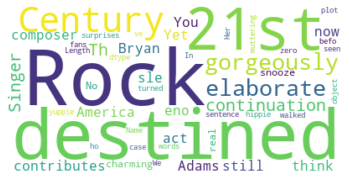

In [53]:
from wordcloud import STOPWORDS
my_stop=set(STOPWORDS)
cloud_rep2 = WordCloud(background_color="white",stopwords=my_stop).generate(str(df_train.sentence))
plt.imshow(cloud_rep2,interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [55]:
my_stopwords = ENGLISH_STOP_WORDS

In [56]:
vect2=CountVectorizer(max_features=1000,max_df=200,min_df=50,stop_words=my_stopwords)
vect2.fit(df_train.sentence)
X2=vect2.transform(df_train.sentence)

In [57]:
my_array2=X2.toarray()
X2_df=pd.DataFrame(my_array2,columns=vect2.get_feature_names())
print(X2_df.head())

   acting  action  actors  actually  age  american  art  audience  away  bad  \
0       0       0       0         0    0         0    0         0     0    0   
1       0       0       0         0    0         0    0         0     0    0   
2       0       0       0         0    0         0    0         0     0    0   
3       0       0       0         0    0         0    0         0     0    0   
4       0       0       0         0    0         0    0         0     0    0   

   ...  way  women  work  works  world  worth  writer  year  years  young  
0  ...    0      0     0      0      0      0       0     0      0      0  
1  ...    0      0     0      0      0      0       1     0      0      0  
2  ...    0      0     0      0      0      0       0     0      0      0  
3  ...    0      0     0      0      0      0       0     0      0      0  
4  ...    0      0     0      0      0      0       0     0      0      0  

[5 rows x 152 columns]


In [59]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [60]:
from nltk.stem import WordNetLemmatizer
wlm=WordNetLemmatizer()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vect3=TfidfVectorizer(max_features=1000,max_df=200,min_df=50,stop_words=my_stopwords).fit(df_train.sentence)
X3=vect3.transform(df_train.sentence)
X3_df=pd.DataFrame(X3.toarray(),columns=vect3.get_feature_names())

In [63]:
X3_df.head(3)

acting  action  actors  actually  age  american  art  audience  away  bad  \
0     0.0     0.0     0.0       0.0  0.0       0.0  0.0       0.0   0.0  0.0   
1     0.0     0.0     0.0       0.0  0.0       0.0  0.0       0.0   0.0  0.0   
2     0.0     0.0     0.0       0.0  0.0       0.0  0.0       0.0   0.0  0.0   

   ...  way  women  work  works  world  worth  writer  year  years  young  
0  ...  0.0    0.0   0.0    0.0    0.0    0.0     0.0   0.0    0.0    0.0  
1  ...  0.0    0.0   0.0    0.0    0.0    0.0     1.0   0.0    0.0    0.0  
2  ...  0.0    0.0   0.0    0.0    0.0    0.0     0.0   0.0    0.0    0.0  

[3 rows x 152 columns]

In [64]:
from sklearn.linear_model import LogisticRegression
#log_reg=LogisticRegression().fit()

In [67]:
sos=pd.read_csv("SOStr.txt",sep="delimiter",header=None)
sos.head()

D:\Softwares\Anaconda_numpy\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


0
0  The|Rock|is|destined|to|be|the|21st|Century|'s...
1  The|gorgeously|elaborate|continuation|of|``|Th...
2                     Effective|but|too-tepid|biopic
3  If|you|sometimes|like|to|go|to|the|movies|to|h...
4  Emerges|as|something|rare|,|an|issue|movie|tha...

In [69]:
sos=sos[0].str.split("|")

In [70]:
sos.head()

0    [The, Rock, is, destined, to, be, the, 21st, C...
1    [The, gorgeously, elaborate, continuation, of,...
2                  [Effective, but, too-tepid, biopic]
3    [If, you, sometimes, like, to, go, to, the, mo...
4    [Emerges, as, something, rare, ,, an, issue, m...
Name: 0, dtype: object

In [71]:
sos_df=pd.DataFrame(sos)
sos_df.head()

0
0  [The, Rock, is, destined, to, be, the, 21st, C...
1  [The, gorgeously, elaborate, continuation, of,...
2                [Effective, but, too-tepid, biopic]
3  [If, you, sometimes, like, to, go, to, the, mo...
4  [Emerges, as, something, rare, ,, an, issue, m...

In [90]:
sos_df.rename(columns={0:"text"},inplace=True)

In [91]:
sos_df.head()

text
0  [The, Rock, is, destined, to, be, the, 21st, C...
1  [The, gorgeously, elaborate, continuation, of,...
2                [Effective, but, too-tepid, biopic]
3  [If, you, sometimes, like, to, go, to, the, mo...
4  [Emerges, as, something, rare, ,, an, issue, m...

In [93]:
len(sos_df["text"][0])

36

In [72]:
sos_df.shape

(11855, 1)

In [73]:
df_train.head()

sentence  length_tokens
0  The Rock is destined to be the 21st Century 's...             36
1  The gorgeously elaborate continuation of `` Th...             38
2  Singer\/composer Bryan Adams contributes a sle...             39
3  You 'd think by now America would have had eno...             19
4               Yet the act is still charming here .              8

In [86]:
temp = TextBlob(str(df_train.sentence[]))
temp.sentiment

Sentiment(polarity=0.2444444444444445, subjectivity=0.7444444444444445)

In [80]:
sample=pd.read_csv("amazon_reviews_sample.xls")
sample.head()

Unnamed: 0  score                                             review
0           0      1   Stuning even for the non-gamer: This sound tr...
1           1      1   The best soundtrack ever to anything.: I'm re...
2           2      1   Amazing!: This soundtrack is my favorite musi...
3           3      1   Excellent Soundtrack: I truly like this sound...
4           4      1   Remember, Pull Your Jaw Off The Floor After H...

In [96]:
vect4=TfidfVectorizer(max_features=1000,stop_words=my_stopwords,ngram_range=(20,25)).fit(df_train.sentence)
X4=vect4.transform(df_train.sentence)
X4_df=pd.DataFrame(X4.toarray(),columns=vect4.get_feature_names())

In [97]:
X4_df.head()

10 15 minutes wendigo larry fessenden spooky new thriller refreshingly smart newfangled variation themes derived far sophisticated knowing horror films  \
0                                                0.0                                                                                                         
1                                                0.0                                                                                                         
2                                                0.0                                                                                                         
3                                                0.0                                                                                                         
4                                                0.0                                                                                                         

   14 year old robert macnaughton year old drew barrymore 10 year old henry thomas convince existence wise wizened visitor faraway  \
0                                                0.0                                                                                 
1                                                0.0                                                                                 
2                                                0.0                                                                                 
3                                                0.0                                                                                 
4                                                0.0                                                                                 

   14 year old robert macnaughton year old drew barrymore 10 year old henry thomas convince existence wise wizened visitor faraway planet  \
0                                                0.0                                                                                        
1                                                0.0                                                                                        
2                                                0.0                                                                                        
3                                                0.0                                                                                        
4                                                0.0                                                                                        

   70 year old godard judge praise love sort bitter old crank sits light meter harangues supposed injustices artistic world large  \
0                                                0.0                                                                                
1                                                0.0                                                                                
2                                                0.0                                                                                
3                                                0.0                                                                                
4                                                0.0                                                                                

   70 year old godard judge praise love sort bitter old crank sits light meter harangues supposed injustices artistic world large doing  \
0                                                0.0                                                                                      
1                                                0.0                                                                                      
2                                                0.0                                                                                      
3                                              

In [99]:
df_dict=pd.read_csv("dictionary.txt",sep="|")
df_dict.head()

!       0
0            ! '   22935
1           ! ''   18235
2         ! Alas  179257
3    ! Brilliant   22936
4  ! Brilliant !   40532

In [101]:
print(df_dict.shape)
df_dict.rename(columns={"!":"phrases",0:"phrase_id"},inplace=True)

(239231, 2)


In [104]:
df_dict.rename(columns={"0":"phrase_id"},inplace=True)
df_dict.head()

phrases  phrase_id
0            ! '      22935
1           ! ''      18235
2         ! Alas     179257
3    ! Brilliant      22936
4  ! Brilliant !      40532

In [105]:
df_labels=pd.read_csv("sentiment_labels.txt",sep="|")
print(df_labels.shape)
df_labels.head()

(239232, 2)


phrase ids  sentiment values
0           0           0.50000
1           1           0.50000
2           2           0.44444
3           3           0.50000
4           4           0.42708

In [107]:
df_labels.rename(columns={"phrase ids":"phrase_id","sentiment values":"sentiment_values"},inplace=True)
df_labels.head()

phrase_id  sentiment_values
0          0           0.50000
1          1           0.50000
2          2           0.44444
3          3           0.50000
4          4           0.42708

In [108]:
sent_with_labels = pd.merge(df_labels,df_dict,on="phrase_id")
print(sent_with_labels.shape)
sent_with_labels.head()

(239231, 3)


phrase_id  sentiment_values  \
0          1           0.50000   
1          2           0.44444   
2          3           0.50000   
3          4           0.42708   
4          5           0.37500   

                                             phrases  
0                                                  '  
1                                                ' (  
2                                  ' ( the cockettes  
3                                ' ( the cockettes )  
4  ' ( the cockettes ) provides a window into a s...

In [111]:
print(df_train.shape)
df_train.head()

(8544, 2)


sentence  length_tokens
0  The Rock is destined to be the 21st Century 's...             36
1  The gorgeously elaborate continuation of `` Th...             38
2  Singer\/composer Bryan Adams contributes a sle...             39
3  You 'd think by now America would have had eno...             19
4               Yet the act is still charming here .              8

In [110]:
temp = pd.merge(df_train,sent_with_labels,left_on="sentence",right_on="phrases")
print(temp.shape)

(8117, 5)


In [112]:
temp.head()

sentence  length_tokens  \
0  The Rock is destined to be the 21st Century 's...             36   
1  The gorgeously elaborate continuation of `` Th...             38   
2  Singer\/composer Bryan Adams contributes a sle...             39   
3  You 'd think by now America would have had eno...             19   
4               Yet the act is still charming here .              8   

   phrase_id  sentiment_values  \
0     226166           0.69444   
1     226300           0.83333   
2     225801           0.62500   
3      14646           0.50000   
4      14644           0.72222   

                                             phrases  
0  The Rock is destined to be the 21st Century 's...  
1  The gorgeously elaborate continuation of `` Th...  
2  Singer\/composer Bryan Adams contributes a sle...  
3  You 'd think by now America would have had eno...  
4               Yet the act is still charming here .

In [116]:
lst=[]
count=0
for i in temp.sentiment_values:
    if i <= 0.2:
        lst.append(0)
    elif i>0.2 and i<=0.4:
        lst.append(1)
    elif i>0.4 and i<=0.6:
        lst.append(2)
    elif i>0.6 and i<=0.8:
        lst.append(3)
    elif i>0.8:
        lst.append(4)

In [117]:
lst[:10]

[3, 4, 3, 2, 3, 4, 4, 3, 4, 3]

In [118]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

In [119]:
temp["Ratings"]=lst

In [120]:
temp.head()

sentence  length_tokens  \
0  The Rock is destined to be the 21st Century 's...             36   
1  The gorgeously elaborate continuation of `` Th...             38   
2  Singer\/composer Bryan Adams contributes a sle...             39   
3  You 'd think by now America would have had eno...             19   
4               Yet the act is still charming here .              8   

   phrase_id  sentiment_values  \
0     226166           0.69444   
1     226300           0.83333   
2     225801           0.62500   
3      14646           0.50000   
4      14644           0.72222   

                                             phrases  Ratings  
0  The Rock is destined to be the 21st Century 's...        3  
1  The gorgeously elaborate continuation of `` Th...        4  
2  Singer\/composer Bryan Adams contributes a sle...        3  
3  You 'd think by now America would have had eno...        2  
4               Yet the act is still charming here .        3

In [121]:
df_try_train = temp.copy()

In [122]:
df_try_train.drop(["phrases","phrase_id","sentiment_values"],axis=1,inplace=True)

In [123]:
df_try_train.head(3)

sentence  length_tokens  Ratings
0  The Rock is destined to be the 21st Century 's...             36        3
1  The gorgeously elaborate continuation of `` Th...             38        4
2  Singer\/composer Bryan Adams contributes a sle...             39        3

In [124]:
df_try_train['Ratings']= label_encoder.fit_transform(df_try_train['Ratings']) 
print(df_try_train.head())

                                            sentence  length_tokens  Ratings
0  The Rock is destined to be the 21st Century 's...             36        3
1  The gorgeously elaborate continuation of `` Th...             38        4
2  Singer\/composer Bryan Adams contributes a sle...             39        3
3  You 'd think by now America would have had eno...             19        2
4               Yet the act is still charming here .              8        3


In [125]:
df_try_train.isnull().sum()

sentence         0
length_tokens    0
Ratings          0
dtype: int64

In [148]:
vect5=TfidfVectorizer(max_features=1000,stop_words=my_stopwords,ngram_range=(1,5)).fit(df_try_train.sentence)
X5=vect5.transform(df_try_train.sentence)
X5_df=pd.DataFrame(X5.toarray(),columns=vect5.get_feature_names())

In [149]:
X5_df.shape

(8117, 1000)

In [131]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
from sklearn import metrics

In [153]:
nb = MultinomialNB()
nb.fit(X5_df,df_try_train.Ratings)

MultinomialNB()

In [154]:
nb.score(X5_df,df_try_train.Ratings)

0.48626339780707156

In [139]:
df_dev=dev.reset_index()

In [140]:
df_dev.head()

index  sentence_index                                           sentence  \
0   1116            1117  It 's a lovely film with lovely performances b...   
1   1117            1118  No one goes unindicted here , which is probabl...   
2   1118            1119  And if you 're not nearly moved to tears by a ...   
3   1119            1120                   A warm , funny , engaging film .   
4   1120            1121  Uses sharp humor and insight into human nature...   

   splitset_label  
0               3  
1               3  
2               3  
3               3  
4               3

In [141]:
df_dev.drop(["index","sentence_index","splitset_label"],axis=1,inplace=True)

In [142]:
temp_dev = pd.merge(df_dev,sent_with_labels,left_on="sentence",right_on="phrases")
print(temp_dev.shape)

(1044, 4)


In [143]:
temp_dev.head()

sentence  phrase_id  \
0  It 's a lovely film with lovely performances b...      25730   
1  No one goes unindicted here , which is probabl...     225163   
2  And if you 're not nearly moved to tears by a ...     222358   
3                   A warm , funny , engaging film .      24502   
4  Uses sharp humor and insight into human nature...      27115   

   sentiment_values                                            phrases  
0           0.79167  It 's a lovely film with lovely performances b...  
1           0.51389  No one goes unindicted here , which is probabl...  
2           0.76389  And if you 're not nearly moved to tears by a ...  
3           0.88889                   A warm , funny , engaging film .  
4           0.80556  Uses sharp humor and insight into human nature...

In [144]:
lst=[]
count=0
for i in temp_dev.sentiment_values:
    if i <= 0.2:
        lst.append(0)
    elif i>0.2 and i<=0.4:
        lst.append(1)
    elif i>0.4 and i<=0.6:
        lst.append(2)
    elif i>0.6 and i<=0.8:
        lst.append(3)
    elif i>0.8:
        lst.append(4)
temp_dev["Ratings"]=lst
temp_dev['Ratings']= label_encoder.fit_transform(temp_dev['Ratings']) 


In [145]:
temp_dev.head()

sentence  phrase_id  \
0  It 's a lovely film with lovely performances b...      25730   
1  No one goes unindicted here , which is probabl...     225163   
2  And if you 're not nearly moved to tears by a ...     222358   
3                   A warm , funny , engaging film .      24502   
4  Uses sharp humor and insight into human nature...      27115   

   sentiment_values                                            phrases  \
0           0.79167  It 's a lovely film with lovely performances b...   
1           0.51389  No one goes unindicted here , which is probabl...   
2           0.76389  And if you 're not nearly moved to tears by a ...   
3           0.88889                   A warm , funny , engaging film .   
4           0.80556  Uses sharp humor and insight into human nature...   

   Ratings  
0        3  
1        2  
2        3  
3        4  
4        4

In [157]:
vect6=TfidfVectorizer(max_features=1000,stop_words=my_stopwords).fit(temp_dev.sentence)
X6=vect5.transform(temp_dev.sentence)
X6_df=pd.DataFrame(X6.toarray(),columns=vect6.get_feature_names())

In [158]:
nb.score(X6_df,temp_dev.Ratings)

0.35727969348659006

In [159]:
df_try_train.head()

sentence  length_tokens  Ratings
0  The Rock is destined to be the 21st Century 's...             36        3
1  The gorgeously elaborate continuation of `` Th...             38        4
2  Singer\/composer Bryan Adams contributes a sle...             39        3
3  You 'd think by now America would have had eno...             19        2
4               Yet the act is still charming here .              8        3

In [160]:
y=df_try_train.Ratings

In [162]:
X=df_try_train.sentence

In [161]:
tfidf_vect = TfidfVectorizer(stop_words="english",max_df=0.7)

In [163]:
tfidf_train=tfidf_vect.fit_transform(X)

In [164]:
tfidf_dev=tfidf_vect.transform(temp_dev.sentence)

In [179]:
tfidf_df=pd.DataFrame(tfidf_train.A,columns=tfidf_vect.get_feature_names())

In [166]:
#tfidf_df["length_of_tokens"]=df_try_train.length_tokens

In [180]:
nb = MultinomialNB()
nb.fit(tfidf_df,y)
nb.score(tfidf_df,y)

0.6639152396205494

In [181]:
log_reg=LogisticRegression()
log_reg.fit(tfidf_df,y)

D:\Softwares\Anaconda_numpy\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [170]:
from sklearn.metrics import accuracy_score

In [182]:
log_reg.score(tfidf_df,y)

0.8004188739682149

In [174]:
tfidf_df_dev=pd.DataFrame(tfidf_dev.A,columns=tfidf_vect.get_feature_names())

In [183]:
pred=log_reg.predict(tfidf_df_dev)

In [185]:
accuracy_score(temp_dev.Ratings,pred)

0.3716475095785441

In [186]:
from sklearn.metrics import confusion_matrix

In [188]:
print(confusion_matrix(temp_dev.Ratings,pred))

[[ 18  72  17  23   2]
 [ 13 158  34  65   6]
 [  3  86  27  91  12]
 [  1  66  18 149  25]
 [  1  21   5  95  36]]


In [189]:
nb_pred=nb.predict(tfidf_df_dev)

In [191]:
accuracy_score(temp_dev.Ratings,nb_pred)

0.3726053639846743